In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA

In [2]:
# Load Iris Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Dataset into pandas DataFrame
df = pd.read_csv(url, names=['sepal length', 'sepal width', 'petal length', 'petal width', 'target'])
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Separating out the features and target
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
X = df.loc[:, features].values
y = df.loc[:, ['target']].values

# Check the dataset
print(X.shape, y.shape)

(150, 4) (150, 1)


In [4]:
# Standardize the data (PCA is affected by Scale)
X = StandardScaler().fit_transform(X)

print(X[0:5, :])

[[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]
 [-1.50652052  0.10644536 -1.2844067  -1.31297673]
 [-1.02184904  1.26346019 -1.3412724  -1.31297673]]


### PCA Projection to 2D
#### The Original data has 4 columns. PCA  projects the original data which is 4 dimensional into 2 dimensions.

In [5]:
# Make an instance of the PCA
pca = PCA(n_components=2)

# Fit the PCA algorithm
principalComponents = pca.fit_transform(X) # array of principal component 1 & 2

In [6]:
# Table of principal components
principalDF = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDF.head()

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [7]:
# Concatenating DataFrame of principal components and targets
finalDF = pd.concat([principalDF, df[['target']]], axis = 1)
finalDF.head()

,principal component 1,principal component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


### Visualize 2D Projection

Text(0, 0.5, 'Principal Component 2')

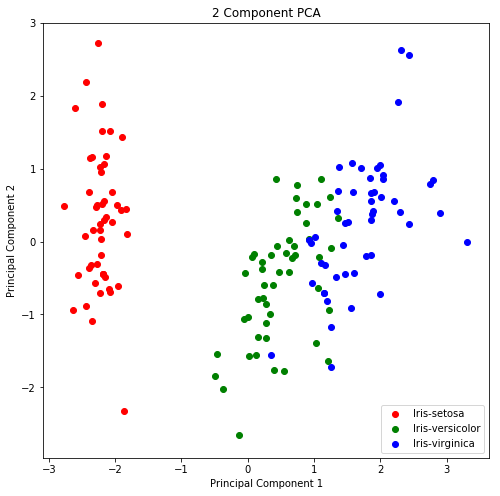

In [8]:
plt.figure(figsize = (8, 8))
plt.title("2 Component PCA")

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    idx = finalDF['target'] == target
    plt.scatter(finalDF.loc[idx, 'principal component 1'], finalDF.loc[idx, 'principal component 2'], c=color)
    
plt.legend(targets)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")


# [Practice 3] : the cancer dataset (PCA) 0: 양성, 1: 악성
### P3.1. You should fill in the blank between # and # with code

In [9]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer

In [10]:
# Load the dataset (Digits Dataset)
breast = load_breast_cancer()

In [11]:
# Check the dataset
X, y = breast.data, breast.target

#######################################
print(X.shape, y.shape) # 1797개의 digits dataset
print(X[0].shape) # 1개의 digit 당 8*8=64 dimentional features
#######################################

(569, 30) (569,)
(30,)


In [12]:
# Concatenate between data and target
label = np.reshape(y, (569, 1))
full_breast = np.concatenate([X, label], axis=1)
full_breast.shape

(569, 31)

In [13]:
# Make the dataframe
df = pd.DataFrame(full_breast)
df.rename(columns = {30 : 'target'}, inplace = True)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


## PCA Projection to 2D
### P3.1. You should write down the answer of the number of features in (?)
#### The Original data has ( ? ) columns(features). PCA  projects the original data which is ( ? ) dimensional into 2 dimensions.

In [14]:
# Make an instance of the PCA
###########################################
pca = PCA(n_components=2)
###########################################


# Fit the PCA algorithm
###########################################
principalComponents = pca.fit_transform(X) # array of principal component 1 & 2
###########################################

In [15]:
# Table of principal components
###########################################
principalDF = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDF.head()
###########################################

,principal component 1,principal component 2
0,1160.142574,-293.917544
1,1269.122443,15.630182
2,995.793889,39.156743
3,-407.180803,-67.380320
4,930.341180,189.340742


In [16]:
# Concatenating DataFrame of principal components and targets
finalDF = pd.concat([principalDF, df[['target']]], axis = 1)
finalDF.head()

,principal component 1,principal component 2,target
0,1160.142574,-293.917544,0.0
1,1269.122443,15.630182,0.0
2,995.793889,39.156743,0.0
3,-407.180803,-67.380320,0.0
4,930.341180,189.340742,0.0


## Visualize 2D Projection

Text(0, 0.5, 'Principal Component 2')

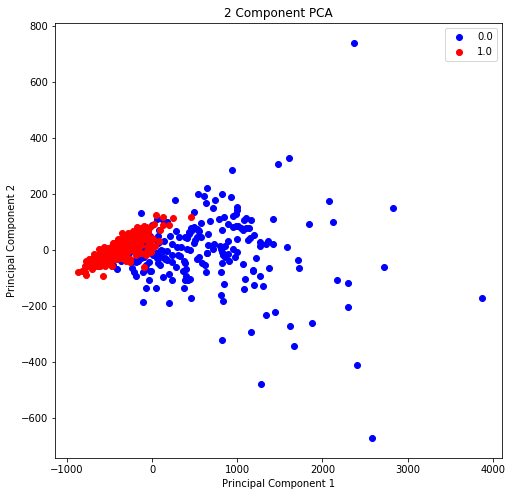

In [17]:
plt.figure(figsize = (8, 8))
plt.title("2 Component PCA")

targets = [0.0, 1.0]
colors = ['b', 'r']
for target, color in zip(targets, colors):
    idx = finalDF['target'] == target
    plt.scatter(finalDF.loc[idx, 'principal component 1'], finalDF.loc[idx, 'principal component 2'], c=color)

plt.legend(targets)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

### P3.3. 다차원의 데이터에서 PCA를 통해 얻은 2차원의 데이터는 0(양성), 1(악성)으로 Classification을 할 수 있을까? (Yes, or No) : ( ? )
### P3.4. 있다면 적절한 ml 알고리즘은 무엇이고 그 이유는?, 없다면 그 이유는? : ( ? )